### HW9 - Data Science , Neural Networks
### Kiarash Gheisari Pour - 402102302

in this assignment we're gonna use an AirQuality dataset available on "https://archive.ics.uci.edu/dataset/360/air+quality" <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

let's import our dataset and take a look at how it looks like.

## Pre Proccessing

In [2]:
df = pd.read_excel('AirQualityUCI.xlsx')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

at first sight our data seems super clean !

let's handle the Date columns and convert into numerical values

In [4]:
# 1st convert the dates into the datetime format
df['Date']= pd.to_datetime(df["Date"])

# Now let's create separate columns
df['year'] = df.Date.dt.year
df['month'] = df.Date.dt.month
df['day'] = df.Date.dt.day
df['day_of_year'] = df.Date.dt.dayofyear

In [5]:
df.drop(['Date'],axis=1,inplace=True)

at first sight the data seemed to have no missing values , but in the informtion provided on the ics archive it's said the the null values are saved as -200

In [10]:
df[df['CO(GT)'] == -200]

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,year,month,day,day_of_year
10,04:00:00,-200.0,1011.00,14,1.293620,526.75,21.0,1817.50,34.0,1196.75,445.25,10.075,60.474999,0.746495,2004,3,11,71
34,04:00:00,-200.0,831.00,10,1.068293,505.75,21.0,1892.75,32.0,1133.75,384.00,6.100,65.900002,0.624754,2004,3,12,72
39,09:00:00,-200.0,1544.50,-200,22.074162,1353.00,-200.0,767.25,-200.0,2058.00,1587.75,9.225,56.199999,0.656065,2004,3,12,72
58,04:00:00,-200.0,1147.00,56,6.199042,821.00,109.0,1132.25,83.0,1411.75,991.50,7.000,71.075001,0.715778,2004,3,13,73
82,04:00:00,-200.0,1129.50,56,5.191654,773.00,70.0,1130.25,82.0,1451.75,1050.50,12.100,61.100001,0.860316,2004,3,14,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,04:00:00,-200.0,993.00,-200,2.275117,604.00,84.8,848.00,65.2,1160.25,761.50,14.525,66.400000,1.091902,2005,3,23,82
9130,04:00:00,-200.0,1122.00,-200,5.977547,810.75,180.7,640.75,91.6,1335.50,1122.00,16.200,71.200001,1.301336,2005,3,26,85
9202,04:00:00,-200.0,883.00,-200,1.330123,530.00,62.6,996.50,46.1,1101.75,616.50,13.650,68.225000,1.061137,2005,3,29,88
9274,04:00:00,-200.0,818.25,-200,0.754318,473.00,46.8,1257.00,40.7,897.75,323.00,13.675,48.825001,0.760612,2005,4,1,91


yep , that seems about right. <br>
let's make them null and see how much missing data we have.

In [6]:
df = df.replace(-200 , pd.NA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Time           9357 non-null   object
 1   CO(GT)         7674 non-null   object
 2   PT08.S1(CO)    8991 non-null   object
 3   NMHC(GT)       914 non-null    object
 4   C6H6(GT)       8991 non-null   object
 5   PT08.S2(NMHC)  8991 non-null   object
 6   NOx(GT)        7718 non-null   object
 7   PT08.S3(NOx)   8991 non-null   object
 8   NO2(GT)        7715 non-null   object
 9   PT08.S4(NO2)   8991 non-null   object
 10  PT08.S5(O3)    8991 non-null   object
 11  T              8991 non-null   object
 12  RH             8991 non-null   object
 13  AH             8991 non-null   object
 14  year           9357 non-null   int32 
 15  month          9357 non-null   int32 
 16  day            9357 non-null   int32 
 17  day_of_year    9357 non-null   int32 
dtypes: int32(4), object(14)
memo

hmmm , the NHMC column has too much missing data that it makes it not really worth it too keep.<br>
lets get rid of it , and for the other missing values we can average the before and after hour of that column and put it instead of the missing value.<br>
seems like a reasonable assumption , we're not expecting the any super major changes in an hour.

In [7]:
df.drop(columns=['NMHC(GT)'] , axis=1 , inplace=True)
df.interpolate(method='linear')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Time           9357 non-null   object
 1   CO(GT)         7674 non-null   object
 2   PT08.S1(CO)    8991 non-null   object
 3   C6H6(GT)       8991 non-null   object
 4   PT08.S2(NMHC)  8991 non-null   object
 5   NOx(GT)        7718 non-null   object
 6   PT08.S3(NOx)   8991 non-null   object
 7   NO2(GT)        7715 non-null   object
 8   PT08.S4(NO2)   8991 non-null   object
 9   PT08.S5(O3)    8991 non-null   object
 10  T              8991 non-null   object
 11  RH             8991 non-null   object
 12  AH             8991 non-null   object
 13  year           9357 non-null   int32 
 14  month          9357 non-null   int32 
 15  day            9357 non-null   int32 
 16  day_of_year    9357 non-null   int32 
dtypes: int32(4), object(13)
memory usage: 1.1+ MB


C:\Users\darkoob\AppData\Local\Temp\ipykernel_18656\2769484561.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear')


oops , we've gotta turn the columns numerical first.

In [8]:
for col in df.columns:
    if col not in ['Time' , 'year' , 'month' , 'day' , 'day_of_year']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
df = df.interpolate(method='linear')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   object 
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
 13  year           9357 non-null   int32  
 14  month          9357 non-null   int32  
 15  day            9357 non-null   int32  
 16  day_of_year    9357 non-null   int32  
dtypes: float64(12), int32(4), object(1)
memory usage: 1.

C:\Users\darkoob\AppData\Local\Temp\ipykernel_18656\4007292570.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear')


alright , everything seems in place . <br>
let's just handle the time column and be done with the cleaning phase and move onto the preproccessing phase.

In [10]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df = df.drop(columns=['Time'])
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,year,month,day,day_of_year,Hour
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004,3,10,70,18
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004,3,10,70,19
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004,3,10,70,20
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004,3,10,70,21
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004,3,10,70,22


In [11]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,year,month,day,day_of_year,Hour
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.130603,1102.932925,10.178838,942.019562,241.908464,832.634930,109.620033,1453.172887,1032.422456,18.231754,49.189157,1.019621,2004.240141,6.310356,15.876884,177.295928,11.498557
std,1.431736,218.201561,7.503295,267.864854,204.308147,255.708807,46.451523,343.201361,404.442611,8.782368,17.194081,0.402203,0.427192,3.438160,8.808653,105.230605,6.923182
min,0.100000,647.250000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679,2004.000000,1.000000,1.000000,1.000000,0.000000
25%,1.100000,937.500000,4.477145,736.000000,96.000000,654.000000,76.000000,1227.000000,733.250000,11.725000,35.800000,0.732280,2004.000000,3.000000,8.000000,84.000000,5.000000
50%,1.800000,1066.750000,8.289085,910.333333,180.000000,803.500000,104.827586,1459.500000,970.000000,17.575000,49.650000,0.989504,2004.000000,6.000000,16.000000,172.000000,11.000000
75%,2.900000,1238.750000,14.096486,1119.000000,326.000000,967.500000,136.400000,1668.250000,1293.000000,24.275001,62.250002,1.306671,2004.000000,9.000000,23.000000,269.000000,18.000000
max,11.900000,2039.750000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036,2005.000000,12.000000,31.000000,366.000000,23.000000


let's pop the target column and set a cutoff for marking the polutants amount in the air too much.

In [18]:
y = df.pop('PT08.S5(O3)')

In [19]:
y2 = y > 1500

below here is the covariance matrix of the air polutants, as seen below it's evident that the polutant to target is O3.<br>
(the fact is any other polutant will fail miserably in the classification task :D)

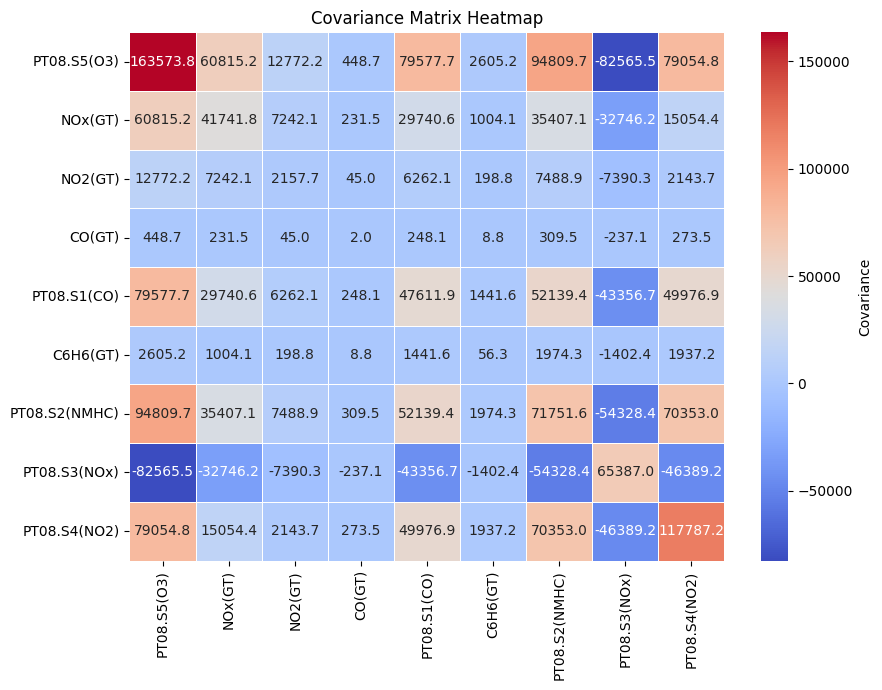

In [249]:
df2 = pd.concat([y , df] , axis = 1)
cov_matrix = df2.iloc[: , :9].cov()

plt.figure(figsize=(9, 7))
sns.heatmap(cov_matrix, 
            annot=True, 
            fmt='0.1f', 
            cmap='coolwarm', 
            linewidths=0.5,
            cbar_kws={'label': 'Covariance'})
plt.title('Covariance Matrix Heatmap')
plt.tight_layout()
plt.show()

### Scaling and splitting

let's scale our df .

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

transformed_data = scaler.fit_transform(df)

In [21]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(transformed_data,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(7485, 16)
(1872, 16)


In [22]:
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(transformed_data,y2,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(7485, 16)
(1872, 16)


In [221]:
y_train_binary.sum()

np.int64(141)

## Multilayer Perceptron with Scikit-Learn
### Binary Classification :

In [227]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5,3,2),max_iter=1000 ,activation='relu')
model.fit(X_train_binary, y_train_binary)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 3, 2), max_iter=1000)

In [228]:
from sklearn.metrics import f1_score
predictions = model.predict(X_test_binary)
f1_score(y_test_binary , predictions , average= "macro")

0.8934901142667488

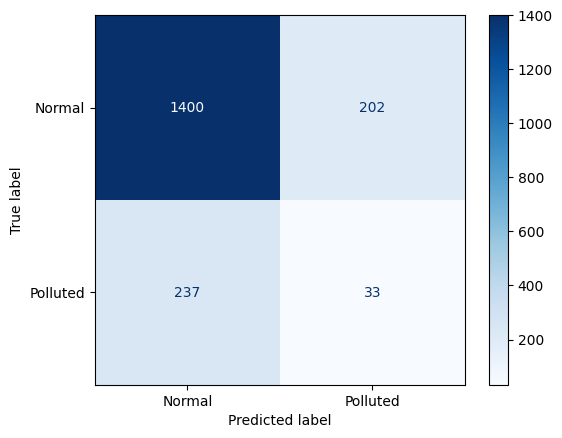

In [229]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test_binary, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Polluted"])
disp.plot(cmap="Blues")

### Regression :

In [230]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(
    hidden_layer_sizes=(7, 5),  
    activation='relu',           
    solver='adam',                
    max_iter=1000,           
    random_state=42               
)

# 3. Train the model
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)

# 5. Evaluate
from sklearn.metrics import r2_score
print("R2-Score:", r2_score(y_test, y_pred))

R2-Score: 0.9061982906240762


c:\Users\darkoob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## 4 Layer feedforward network with Keras 
### Binary Classification
Keras related tasks are in the other notebook.

## 4 Layer feedforward network with Pytorch
### Binary Classification

In [23]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch import Tensor

In [61]:
tensor_X_train = Tensor(X_train_binary)
tensor_y_train = Tensor(y_train_binary.values.astype(np.float64))
tensor_X_test = Tensor(X_test_binary)
tensor_y_test = Tensor(y_test_binary.values.astype(np.float64))

train_set = TensorDataset(tensor_X_train,tensor_y_train)
test_set = TensorDataset(tensor_X_test,tensor_y_test)


train_dl = DataLoader(train_set,batch_size=32, shuffle=True)
test_dl = DataLoader(test_set,batch_size=32, shuffle=True)

In [65]:
layers = []
layers.append(nn.Linear(X_train.shape[1], 32))
layers.append(nn.ReLU())

layers.append(nn.Linear(32, 32))
layers.append(nn.ReLU())

layers.append(nn.Linear(32, 16))
layers.append(nn.ReLU())

layers.append(nn.Linear(16, 4))
layers.append(nn.ReLU())

layers.append(nn.Linear(4, 1))
layers.append(nn.Sigmoid())

model = nn.Sequential(*layers)

In [66]:
from torch.nn import BCELoss
from torch.optim import Adam

criterion = BCELoss()
optimizer = Adam(model.parameters(), lr=0.0001)

In [67]:
from sklearn.metrics import f1_score

for epoch in range(100):
    running_loss = 0.0
    all_targets = []
    all_preds = []

    for i, (inputs, targets) in enumerate(train_dl):
        optimizer.zero_grad()
        yhat = model(inputs)
        loss = criterion(yhat.ravel(), targets.float())  # Ensure targets are float for BCE
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        # Store targets and predictions for F1
        preds = (yhat > 0.5).float()  # Threshold for binary classification
        all_targets.extend(targets.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

        # Print every 100 batches
        if i % 100 == 0:
            avg_loss = running_loss / (i + 1)
            current_f1 = f1_score(all_targets, all_preds, zero_division=0)  # Compute F1
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] Loss: {avg_loss:.3f}, F1: {current_f1:.3f}')
            running_loss = 0.0
            all_targets = []  # Reset for next reporting window
            all_preds = []

[Epoch 1, Batch 1] Loss: 0.628, F1: 0.000
[Epoch 1, Batch 101] Loss: 0.614, F1: 0.000
[Epoch 1, Batch 201] Loss: 0.304, F1: 0.000
[Epoch 2, Batch 1] Loss: 0.597, F1: 0.000
[Epoch 2, Batch 101] Loss: 0.590, F1: 0.000
[Epoch 2, Batch 201] Loss: 0.290, F1: 0.000
[Epoch 3, Batch 1] Loss: 0.623, F1: 0.000
[Epoch 3, Batch 101] Loss: 0.539, F1: 0.000
[Epoch 3, Batch 201] Loss: 0.242, F1: 0.000
[Epoch 4, Batch 1] Loss: 0.541, F1: 0.000
[Epoch 4, Batch 101] Loss: 0.431, F1: 0.000
[Epoch 4, Batch 201] Loss: 0.211, F1: 0.000
[Epoch 5, Batch 1] Loss: 0.289, F1: 0.000
[Epoch 5, Batch 101] Loss: 0.421, F1: 0.000
[Epoch 5, Batch 201] Loss: 0.188, F1: 0.000
[Epoch 6, Batch 1] Loss: 0.505, F1: 0.000
[Epoch 6, Batch 101] Loss: 0.380, F1: 0.000
[Epoch 6, Batch 201] Loss: 0.182, F1: 0.000
[Epoch 7, Batch 1] Loss: 0.531, F1: 0.000
[Epoch 7, Batch 101] Loss: 0.344, F1: 0.000
[Epoch 7, Batch 201] Loss: 0.167, F1: 0.000
[Epoch 8, Batch 1] Loss: 0.455, F1: 0.000
[Epoch 8, Batch 101] Loss: 0.302, F1: 0.000
[Epo

In [68]:
from sklearn.metrics import precision_recall_fscore_support
precision = 0
recall = 0
total_itr = 0
for i, (inputs, targets) in enumerate(test_dl):
    # evaluate the model on the test set
    yhat = model(inputs).ravel()
    pr,rc,f1,_ = precision_recall_fscore_support(yhat.detach().numpy()>0.4, targets.detach().numpy(), average='macro')
    precision += pr
    recall += rc
    total_itr += 1

precision /= total_itr
recall /= total_itr

print('Macro F1-score is %.2f' %(2*precision*recall/(precision+recall)))

Macro F1-score is 0.88


c:\Users\darkoob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\darkoob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Regression

In [79]:
tensor_X_train = Tensor(X_train)
tensor_y_train = Tensor(y_train.values.astype(np.float64))
tensor_X_test = Tensor(X_test)
tensor_y_test = Tensor(y_test.values.astype(np.float64))

train_set = TensorDataset(tensor_X_train,tensor_y_train)
test_set = TensorDataset(tensor_X_test,tensor_y_test)


train_dl = DataLoader(train_set,batch_size=32, shuffle=True)
test_dl = DataLoader(test_set,batch_size=32, shuffle=True)

In [83]:
from torch import optim
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 32),  
    nn.ReLU(),
                            
    nn.Linear(32, 32), 
    nn.ReLU(),
    
    nn.Linear(32, 4),
    nn.ReLU(),

    nn.Linear(4, 1)
)
criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

for epoch in range(150):
    running_loss = 0.0
    all_targets = []
    all_preds = []

    for i, (inputs, targets) in enumerate(train_dl):
        optimizer.zero_grad()
        yhat = model(inputs).ravel()  # Flatten output
        loss = criterion(yhat, targets.float())  # Ensure float targets
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        all_targets.extend(targets.cpu().numpy())
        all_preds.extend(yhat.detach().cpu().numpy())  # Detach to avoid memory leaks

        # Print every 100 batches
        if i % 100 == 0:
            avg_loss = running_loss / (i + 1)
            mse = mean_squared_error(all_targets, all_preds)
            mae = mean_absolute_error(all_targets, all_preds)
            r2 = r2_score(all_targets, all_preds)
            print(
                f"[Epoch {epoch+1}, Batch {i+1}] "
                f"Loss: {avg_loss:.3f}, MSE: {mse:.3f}, "
                f"MAE: {mae:.3f}, R²: {r2:.3f}"
            )
            running_loss = 0.0
            all_targets = []
            all_preds = []

[Epoch 1, Batch 1] Loss: 1148470.500, MSE: 1148470.512, MAE: 1004.607, R²: -7.248
[Epoch 1, Batch 101] Loss: 1208381.493, MSE: 1220465.305, MAE: 1028.345, R²: -6.485
[Epoch 1, Batch 201] Loss: 559821.201, MSE: 1125240.605, MAE: 982.809, R²: -5.882
[Epoch 2, Batch 1] Loss: 932767.688, MSE: 932767.667, MAE: 889.779, R²: -4.546
[Epoch 2, Batch 101] Loss: 372972.599, MSE: 376702.326, MAE: 498.559, R²: -1.336
[Epoch 2, Batch 201] Loss: 45661.838, MSE: 91780.295, MAE: 241.876, R²: 0.439
[Epoch 3, Batch 1] Loss: 93857.844, MSE: 93857.843, MAE: 256.187, R²: 0.441
[Epoch 3, Batch 101] Loss: 81624.385, MSE: 82440.628, MAE: 234.454, R²: 0.493
[Epoch 3, Batch 201] Loss: 37081.379, MSE: 74533.572, MAE: 220.781, R²: 0.534
[Epoch 4, Batch 1] Loss: 64538.270, MSE: 64538.272, MAE: 215.295, R²: 0.447
[Epoch 4, Batch 101] Loss: 65604.859, MSE: 66260.908, MAE: 209.182, R²: 0.584
[Epoch 4, Batch 201] Loss: 31530.135, MSE: 63375.572, MAE: 202.362, R²: 0.616
[Epoch 5, Batch 1] Loss: 77097.242, MSE: 77097.242

In [85]:
from torch import no_grad
def evaluate_model(model, test_dl):
    model.eval()
    all_targets = []
    all_preds = []
    
    with no_grad():
        for inputs, targets in test_dl:
            outputs = model(inputs).squeeze()
            all_targets.extend(targets.cpu().numpy())
            all_preds.extend(outputs.cpu().numpy())
    
    # Calculate metrics
    mse = mean_squared_error(all_targets, all_preds)
    mae = mean_absolute_error(all_targets, all_preds)
    r2 = r2_score(all_targets, all_preds)
    
    print(f"Test MSE: {mse:.4f}")
    print(f"Test MAE: {mae:.4f}")
    print(f"Test R²: {r2:.4f}")
    
    return all_preds, all_targets

# Usage
predictions, true_values = evaluate_model(model, test_dl)

Test MSE: 15789.6247
Test MAE: 93.7356
Test R²: 0.9070
